# Exercise model image classification with TensorFlow


In [6]:
# Import the necessary modules
# zipfile for reading ZIP archives, os for interacting with the operating system
import zipfile, os

# Define the path to the ZIP file
local_zip = "../../../data/images/archive.zip"

# Open the ZIP file in read mode
zip_ref = zipfile.ZipFile(local_zip, "r")

# Extract all files from the ZIP file to the /tmp directory
zip_ref.extractall("/tmp")

# Close the ZIP file
zip_ref.close()

# Define the base directory where the images are stored
base_dir = "/tmp/images"

# Define the directory for training images
# os.path.join is used to concatenate the paths in a way that uses the correct directory separators for the current operating system
train_dir = os.path.join(base_dir, "train")

# Define the directory for validation images
validation_dir = os.path.join(base_dir, "val")

In [7]:
os.listdir("/tmp/images/train")

['clean', 'messy']

In [8]:
os.listdir("/tmp/images/val")

['clean', 'messy']

In [9]:
# Import necessary library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tkinter as tk
from tkinter import filedialog

In [10]:
# Create an instance of the ImageDataGenerator class for training data
train_datagen = ImageDataGenerator(
    # Rescale the pixel values (between 0 and 255) to the range 0-1
    rescale=1.0 / 255,
    # Randomly apply rotations up to 20 degrees
    rotation_range=20,
    # Randomly flip inputs horizontally
    horizontal_flip=True,
    # Randomly apply shear transformations
    shear_range=0.2,
    # Specifies how to fill in newly created pixels, which can appear after a rotation or a width/height shift
    fill_mode="nearest",
)

# Create an instance of the ImageDataGenerator class for testing data
test_datagen = ImageDataGenerator(
    # Rescale the pixel values (between 0 and 255) to the range 0-1
    rescale=1.0
    / 255
)

In [11]:
# Use the ImageDataGenerator instance to read images from the filesystem
# and preprocess them into proper tensors. This will also resize and batch the images.
train_generator = train_datagen.flow_from_directory(
    # The directory where the training data is located
    train_dir,
    # The dimensions to which all images found will be resized
    target_size=(150, 150),
    # The size of the batches of data (default: 32)
    batch_size=4,
    # "binary": means that the labels are binary,
    # useful for binary_crossentropy loss, returns 1D binary labels
    class_mode="binary",
)

# Create a similar generator for validation data
validation_generator = train_datagen.flow_from_directory(
    # The directory where the validation data is located
    validation_dir,
    # The dimensions to which all images found will be resized
    target_size=(150, 150),
    # The size of the batches of data (default: 32)
    batch_size=4,
    # "binary": means that the labels are binary,
    # useful for binary_crossentropy loss, returns 1D binary labels
    class_mode="binary",
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
# Initialize a Sequential model
model = tf.keras.models.Sequential(
    [
        # Add a 2D convolution layer with 32 output filters, a 3x3 kernel, and 'relu' activation function
        # The input shape is specified as (150, 150, 3), which corresponds to images of size 150x150 with 3 color channels
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        # Add a max pooling layer with a 2x2 pool size to reduce the spatial dimensions of the output
        tf.keras.layers.MaxPooling2D(2, 2),
        # Add another 2D convolution layer with 64 output filters and a 3x3 kernel
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        # Add another max pooling layer
        tf.keras.layers.MaxPooling2D(2, 2),
        # Add a 2D convolution layer with 128 output filters and a 3x3 kernel
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        # Add another max pooling layer
        tf.keras.layers.MaxPooling2D(2, 2),
        # Add a 2D convolution layer with 512 output filters and a 3x3 kernel
        tf.keras.layers.Conv2D(512, (3, 3), activation="relu"),
        # Add another max pooling layer
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the tensor output from the previous layer to create a single long feature vector
        tf.keras.layers.Flatten(),
        # Add a fully connected layer with 512 units and 'relu' activation function
        tf.keras.layers.Dense(512, activation="relu"),
        # Add the output layer with 1 unit (for binary classification) and 'sigmoid' activation function
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [13]:
# Check the summary of the architecture data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
# Compile the model with `Adam` optimizer and `binary_crossentropy`
model.compile(
    loss="binary_crossentropy", optimizer=tf.optimizers.Adam(), metrics=["accuracy"]
)

In [15]:
# TensorFlow model training

model.fit(  # This is the method to train the model.
    train_generator,  # This is the training data generator. It generates batches of tensor image data with real-time data augmentation.
    steps_per_epoch=25,  # This is the total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. It is usually the number of unique samples in your dataset divided by the batch size.
    epochs=20,  # An epoch is an iteration over the entire data provided. This code will train the model for 20 epochs.
    validation_data=validation_generator,  # This is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
    validation_steps=5,  # Number of steps (batches of samples) to draw from the validation generator for evaluation.
    verbose=2,  # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Here, it's set to 2, so it will output one line per epoch.
)

Epoch 1/20


25/25 - 7s - loss: 0.8040 - accuracy: 0.5100 - val_loss: 0.6922 - val_accuracy: 0.5000 - 7s/epoch - 268ms/step
Epoch 2/20
25/25 - 4s - loss: 0.6935 - accuracy: 0.5100 - val_loss: 0.6898 - val_accuracy: 0.5000 - 4s/epoch - 165ms/step
Epoch 3/20
25/25 - 5s - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6909 - val_accuracy: 0.6500 - 5s/epoch - 181ms/step
Epoch 4/20
25/25 - 5s - loss: 0.7090 - accuracy: 0.5200 - val_loss: 0.6576 - val_accuracy: 0.6000 - 5s/epoch - 200ms/step
Epoch 5/20
25/25 - 5s - loss: 0.6778 - accuracy: 0.5500 - val_loss: 0.6233 - val_accuracy: 0.5500 - 5s/epoch - 195ms/step
Epoch 6/20
25/25 - 4s - loss: 0.7076 - accuracy: 0.6100 - val_loss: 0.5585 - val_accuracy: 0.7000 - 4s/epoch - 180ms/step
Epoch 7/20
25/25 - 4s - loss: 0.6202 - accuracy: 0.6400 - val_loss: 0.6651 - val_accuracy: 0.6500 - 4s/epoch - 179ms/step
Epoch 8/20
25/25 - 5s - loss: 0.6344 - accuracy: 0.6500 - val_loss: 0.5514 - val_accuracy: 0.7500 - 5s/epoch - 182ms/step
Epoch 9/20
25/25 - 4s 

1/1 [==============================] - 0s 26ms/step
C:/Users/lenovo/Downloads/download.jpeg
clean


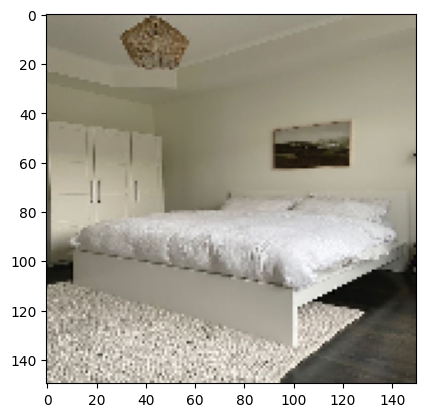

In [18]:
# Check the model image classifier

root = tk.Tk()
root.withdraw  # we don't want a full GUI, so keep the root window from appearing

# Show an "Open" dialog box and return the path to the selected file
filename = filedialog.askopenfilename()

# Predicting images
path = filename
img = image.load_img(path, target_size=(150, 150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(filename)
if classes[0][0] == 0:
    print("clean")
else:
    print("messy")